# Preprocessing
Features to get: region,	price,	year,	manufacturer,	model, fuel,	title_status,	transmission,	drive,	type,	state

## Importing File

In [1]:
from google.colab import files
datafile = files.upload()

## Convert data to dataframe

In [2]:
import pandas as pd

df = pd.read_csv('used_cars.csv',engine="python")
pd.set_option('display.max_columns', None)
df.head()

,Unnamed: 0,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,vin,drive,size,type,paint_color,image_url,description,county,state,lat,long
0,0,7034441763,https://saltlakecity.craigslist.org/cto/d/salt...,salt lake city,https://saltlakecity.craigslist.org,17899,2012.0,volkswagen,golf r,excellent,4 cylinders,gas,63500.0,clean,manual,WVWPF7AJ6CW316713,4wd,compact,hatchback,black,https://images.craigslist.org/00G0G_fTLDWM5Xyv...,PRICE REDUCED! -Garage kept -Low Miles (63K)...,NaN,ut,40.7372,-111.858
1,1,7034440610,https://saltlakecity.craigslist.org/ctd/d/sand...,salt lake city,https://saltlakecity.craigslist.org,0,2016.0,ford,f-150,excellent,NaN,gas,10.0,clean,automatic,1FTMF1EP3GKF13544,4wd,NaN,NaN,NaN,https://images.craigslist.org/00v0v_7Cu0buIofU...,Drive it home today. Call (Or Text) us now !!C...,NaN,ut,40.5881,-111.884
2,2,7034440588,https://saltlakecity.craigslist.org/ctd/d/sand...,salt lake city,https://saltlakecity.craigslist.org,46463,2015.0,gmc,sierra 1500,excellent,NaN,gas,7554.0,clean,automatic,3GTU2WEC6FG228025,4wd,NaN,NaN,white,https://images.craigslist.org/01515_lPvJ9bfbdY...,Drive it home today. Call (Or Text) us now !!C...,NaN,ut,40.5881,-111.884
3,3,7034440546,https://saltlakecity.craigslist.org/ctd/d/sand...,salt lake city,https://saltlakecity.craigslist.org,0,2016.0,ford,f-150,excellent,NaN,gas,10.0,clean,automatic,1FTEX1EF6GKD25447,4wd,NaN,NaN,NaN,https://images.craigslist.org/00T0T_6Rjfp3NS4O...,Drive it home today. Call (Or Text) us now !!C...,NaN,ut,40.5881,-111.884
4,4,7034406932,https://saltlakecity.craigslist.org/ctd/d/evan...,salt lake city,https://saltlakecity.craigslist.org,49999,2018.0,ford,f-450,NaN,NaN,diesel,70150.0,clean,automatic,1FT8W4DT8GEA90427,4wd,NaN,pickup,white,https://images.craigslist.org/00W0W_8yIUwRBXXd...,2018 Ford F-350 F350 F 350 SD Lariat Crew Cab ...,NaN,ut,40.3744,-104.694


## Seeing properties of Table

In [3]:
df.describe()

,Unnamed: 0,id,price,year,odometer,county,lat,long
count,20001.000000,2.000100e+04,2.000100e+04,19989.000000,1.761200e+04,0.0,18970.000000,18970.000000
mean,10000.000000,7.043199e+09,7.664058e+04,2009.830657,9.916435e+04,NaN,40.394737,-86.300395
std,5773.935703,4.668820e+06,8.335762e+06,7.913613,7.963487e+04,NaN,4.440290,18.219242
min,0.000000,7.032597e+09,0.000000e+00,1917.000000,0.000000e+00,NaN,-51.812200,-155.901000
25%,5000.000000,7.040114e+09,3.970000e+03,2007.000000,5.013300e+04,NaN,37.273700,-80.166800
50%,10000.000000,7.043866e+09,8.795000e+03,2011.000000,9.389900e+04,NaN,38.258600,-77.514200
75%,15000.000000,7.047065e+09,1.749500e+04,2015.000000,1.339090e+05,NaN,44.439500,-76.238400
max,20000.000000,7.050101e+09,1.172420e+09,2020.000000,2.500005e+06,NaN,59.746600,9.095700


## Seeing null value (if any)
0 value in column price is also considered as null

In [4]:
import numpy as np
print("price           ",np.count_nonzero(df.price==0))
print(df.isna().sum())

#every row has null value

price            2488
Unnamed: 0          0
id                  0
url                 0
region              0
region_url          0
price               0
year               12
manufacturer      705
model             265
condition        9152
cylinders        7085
fuel               73
odometer         2389
title_status      110
transmission      190
vin              6645
drive            4642
size            13115
type             3659
paint_color      5514
image_url           0
description         0
county          20001
state               0
lat              1031
long             1031
dtype: int64


## Dropping some columns
**county** since it's only useless column left in by mistake and all values are null

**url** since it's only display listing URL and won't affect clustering nor classification

**region_url** since it's only display region URL and won't affect clustering nor classification

**image_url** since it's only display image URL and won't affect clustering nor classification

**description** since it's content is only about how to contact a person to buy the car

**Unnamed: 0** since it's not really clear about what is it

**id** since it's only ID of data

also deleting a column if its **mode is null or empty**


In [5]:
df= df.loc[:, df.columns != 'county']
df= df.loc[:, df.columns != 'url']
df= df.loc[:, df.columns != 'region_url']
df= df.loc[:, df.columns != 'image_url']
df= df.loc[:, df.columns != 'description'] #since it only shows contact number and promotion
df= df.loc[:, df.columns != 'Unnamed: 0']
df= df.loc[:, df.columns != 'id']

number_of_row = df.shape[0]
df2 = df.copy()
df2.fillna("empty", inplace = True)
from collections import Counter
for col in df2.columns:
  c = Counter(df2[col]) 
  print("checking: ",col," mode: ",df2[col].mode().values)
  if df2[col].mode().values == 'empty':
    df= df.loc[:, df.columns != col]
# df.columns
df2.iloc[0:0]

checking:  region  mode:  ['bellingham']
checking:  price  mode:  [0]
checking:  year  mode:  [2016.0]
checking:  manufacturer  mode:  ['ford']
checking:  model  mode:  ['f-150']
checking:  condition  mode:  ['empty']
checking:  cylinders  mode:  ['empty']
checking:  fuel  mode:  ['gas']
checking:  odometer  mode:  ['empty']
checking:  title_status  mode:  ['clean']
checking:  transmission  mode:  ['automatic']
checking:  vin  mode:  ['empty']
checking:  drive  mode:  ['4wd']
checking:  size  mode:  ['empty']
checking:  type  mode:  ['sedan']
checking:  paint_color  mode:  ['empty']
checking:  state  mode:  ['va']
checking:  lat  mode:  ['empty']


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  app.launch_new_instance()


checking:  long  mode:  ['empty']


,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,vin,drive,size,type,paint_color,state,lat,long


## Changing NULL Value
If the type of whole column is **string**, change the null value of its column with **mode**

If the type of whole column is **float**, change the null value of its column with **median**

In [6]:
import numpy as np
to_replace = ''
for col in df.columns:
  if df[col].values.dtype != float and df[col].values.dtype != int:
    to_replace = df[col].mode().values[0]
    df[col].fillna(to_replace,inplace = True)
  elif df[col].values.dtype == float or df[col].values.dtype == int:
    to_replace= float(df[col].median())
    df[col].fillna(to_replace, inplace = True)

df = df.replace({'price': {0: df['price'].median()}})
df

,region,price,year,manufacturer,model,fuel,title_status,transmission,drive,type,state
0,salt lake city,17899.0,2012.0,volkswagen,golf r,gas,clean,manual,4wd,hatchback,ut
1,salt lake city,8795.0,2016.0,ford,f-150,gas,clean,automatic,4wd,sedan,ut
2,salt lake city,46463.0,2015.0,gmc,sierra 1500,gas,clean,automatic,4wd,sedan,ut
3,salt lake city,8795.0,2016.0,ford,f-150,gas,clean,automatic,4wd,sedan,ut
4,salt lake city,49999.0,2018.0,ford,f-450,diesel,clean,automatic,4wd,pickup,ut
...,...,...,...,...,...,...,...,...,...,...,...
19996,kennewick-pasco-richland,49999.0,2016.0,ram,cummin 2500 laramie,diesel,clean,automatic,4wd,truck,wa
19997,kennewick-pasco-richland,12127.0,2018.0,nissan,sentra,gas,clean,automatic,fwd,sedan,wa
19998,kennewick-pasco-richland,8795.0,2019.0,jeep,grand cherokee limited,gas,clean,automatic,4wd,SUV,wa
19999,kennewick-pasco-richland,14661.0,2017.0,toyota,corolla,gas,clean,automatic,fwd,sedan,wa


##Checking null values again, just to make sure there's no null value left

In [7]:
print("price          ",np.count_nonzero(df.price==0))
print(df.isna().sum())

price           0
region          0
price           0
year            0
manufacturer    0
model           0
fuel            0
title_status    0
transmission    0
drive           0
type            0
state           0
dtype: int64


##Finding outliers

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<Figure size 7200x7200 with 0 Axes>

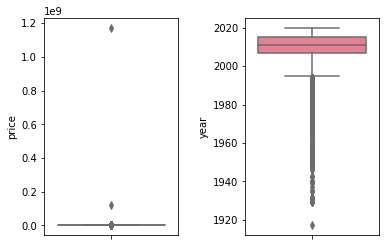

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.cbook import boxplot_stats

# df = df.drop(df[df.price >= 34000].index)
plt.figure(figsize=(100, 100))
f, axes = plt.subplots(1, 2)
sns.boxplot(data = df, y ="price", palette="husl", ax = axes[0])
sns.boxplot(data = df, y ="year", palette="husl", ax = axes[1])

plt.subplots_adjust(wspace=0.5) 
plt.show() 

"Borders of outliers are:"
price_outliers = min([y for stat in boxplot_stats(df['price']) for y in stat['fliers']]) #needs to be run several times to get 35490 as minimum of outlier values. If error, comment the year_outliers below 
year_outliers = max([y for stat in boxplot_stats(df['year']) for y in stat['fliers']])

##Deleting Outlier

<Figure size 7200x7200 with 0 Axes>

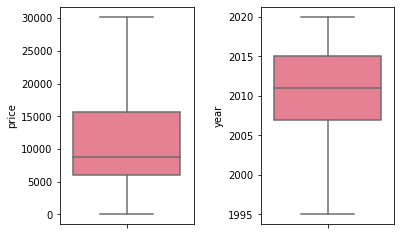

In [0]:
df = df.drop(df[df.price >= price_outliers].index)
df = df.drop(df[df.year <= year_outliers].index)

plt.figure(figsize=(100, 100))
f, axes = plt.subplots(1, 2)
sns.boxplot(data = df, y ="price", palette="husl", ax = axes[0])
sns.boxplot(data = df, y ="year", palette="husl", ax = axes[1])

plt.subplots_adjust(wspace=0.5) 
plt.show() 

##Encoding string data

In [0]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
for col in df.select_dtypes(include=['object','category']).columns:
    df[col] = df[col].astype('category')
    df[col] = df[col].cat.codes
df

,region,price,year,manufacturer,model,fuel,title_status,transmission,drive,type,state
0,12,17899.0,2012.0,37,1891,2,0,1,0,4,0
1,12,8795.0,2016.0,11,1525,2,0,0,0,9,0
3,12,8795.0,2016.0,11,1525,2,0,0,0,9,0
5,12,13999.0,2009.0,31,1525,2,0,0,0,8,0
7,12,14500.0,2007.0,12,2876,2,0,0,0,8,0
...,...,...,...,...,...,...,...,...,...,...,...
19994,5,2200.0,2005.0,28,2340,2,0,0,0,0,3
19995,5,24999.0,2017.0,34,3512,2,0,1,0,9,3
19997,5,12127.0,2018.0,28,2836,2,0,0,1,9,3
19998,5,8795.0,2019.0,18,1917,2,0,0,0,0,3


## Saving data

In [0]:
from google.colab import files
df.to_csv('used_cars_processed.csv') 
files.download('used_cars_processed.csv')

## ******Further steps of preprocessing might be available in the other files (classification and clustering) if needed**